## Quick Instructions

Click on the Python cells below and shift-Enter to run them. They may require a minute or so. The one at the bottom is adjustable to explore different ideas.

## Egon in the Monte Carlo piazza

This math problem is stated as a procedure that is repeated over and over again. The question is whether the procedure produces a result that is obvious or surprising.


Egon is a painter and a poet. He lives in the beautiful town of Monte Carlo. He one day finds a die in his beard (the little cube with the pips on each face you use in games like Yahtse).  Egon starts rolling numbers from one to six, noticing that each number comes up with equal probability. Egon imagines a random procedure for using the die to paint a gigantic triangle on the town square (or as they say in Monte Carlo, the piazza). And so on the piazza he places three cans of paint A, B and C on the ground as markers -- far apart from one another -- to define the corners of triangle ABC. He walks to a fourth location somewhere near triangle ABC. There he begins his procedure: 


Procedure:


  Roll the die
  
    on a 1 or 2: Move halfway to A
    
    on a 3 or 4: Move halfway to B
    
    on a 5 or 6: Move halfway to C 
    
  Paint a little dot on the ground (red if A, green if B, blue if C)
  
  Repeat
  
  
Using this method Egon rolls, moves, and paints repeatedly. He figures that after some time he will completely finish painting in triangle ABC with red, green and blue dots. Is he correct? Or might something unexpected result?

The Python program below simulates Egon's painting process using a random number generator. It shows what the piazza looks like after Egon has painted some number of dots. It will take a moment for the computer to produce this picture.

As always: Click on the cell to select it, hold down Shift, hit Enter. Change the value of 'nRolls' to make more or fewer dots.

Populating the interactive namespace from numpy and matplotlib


(0.0, 1.0)

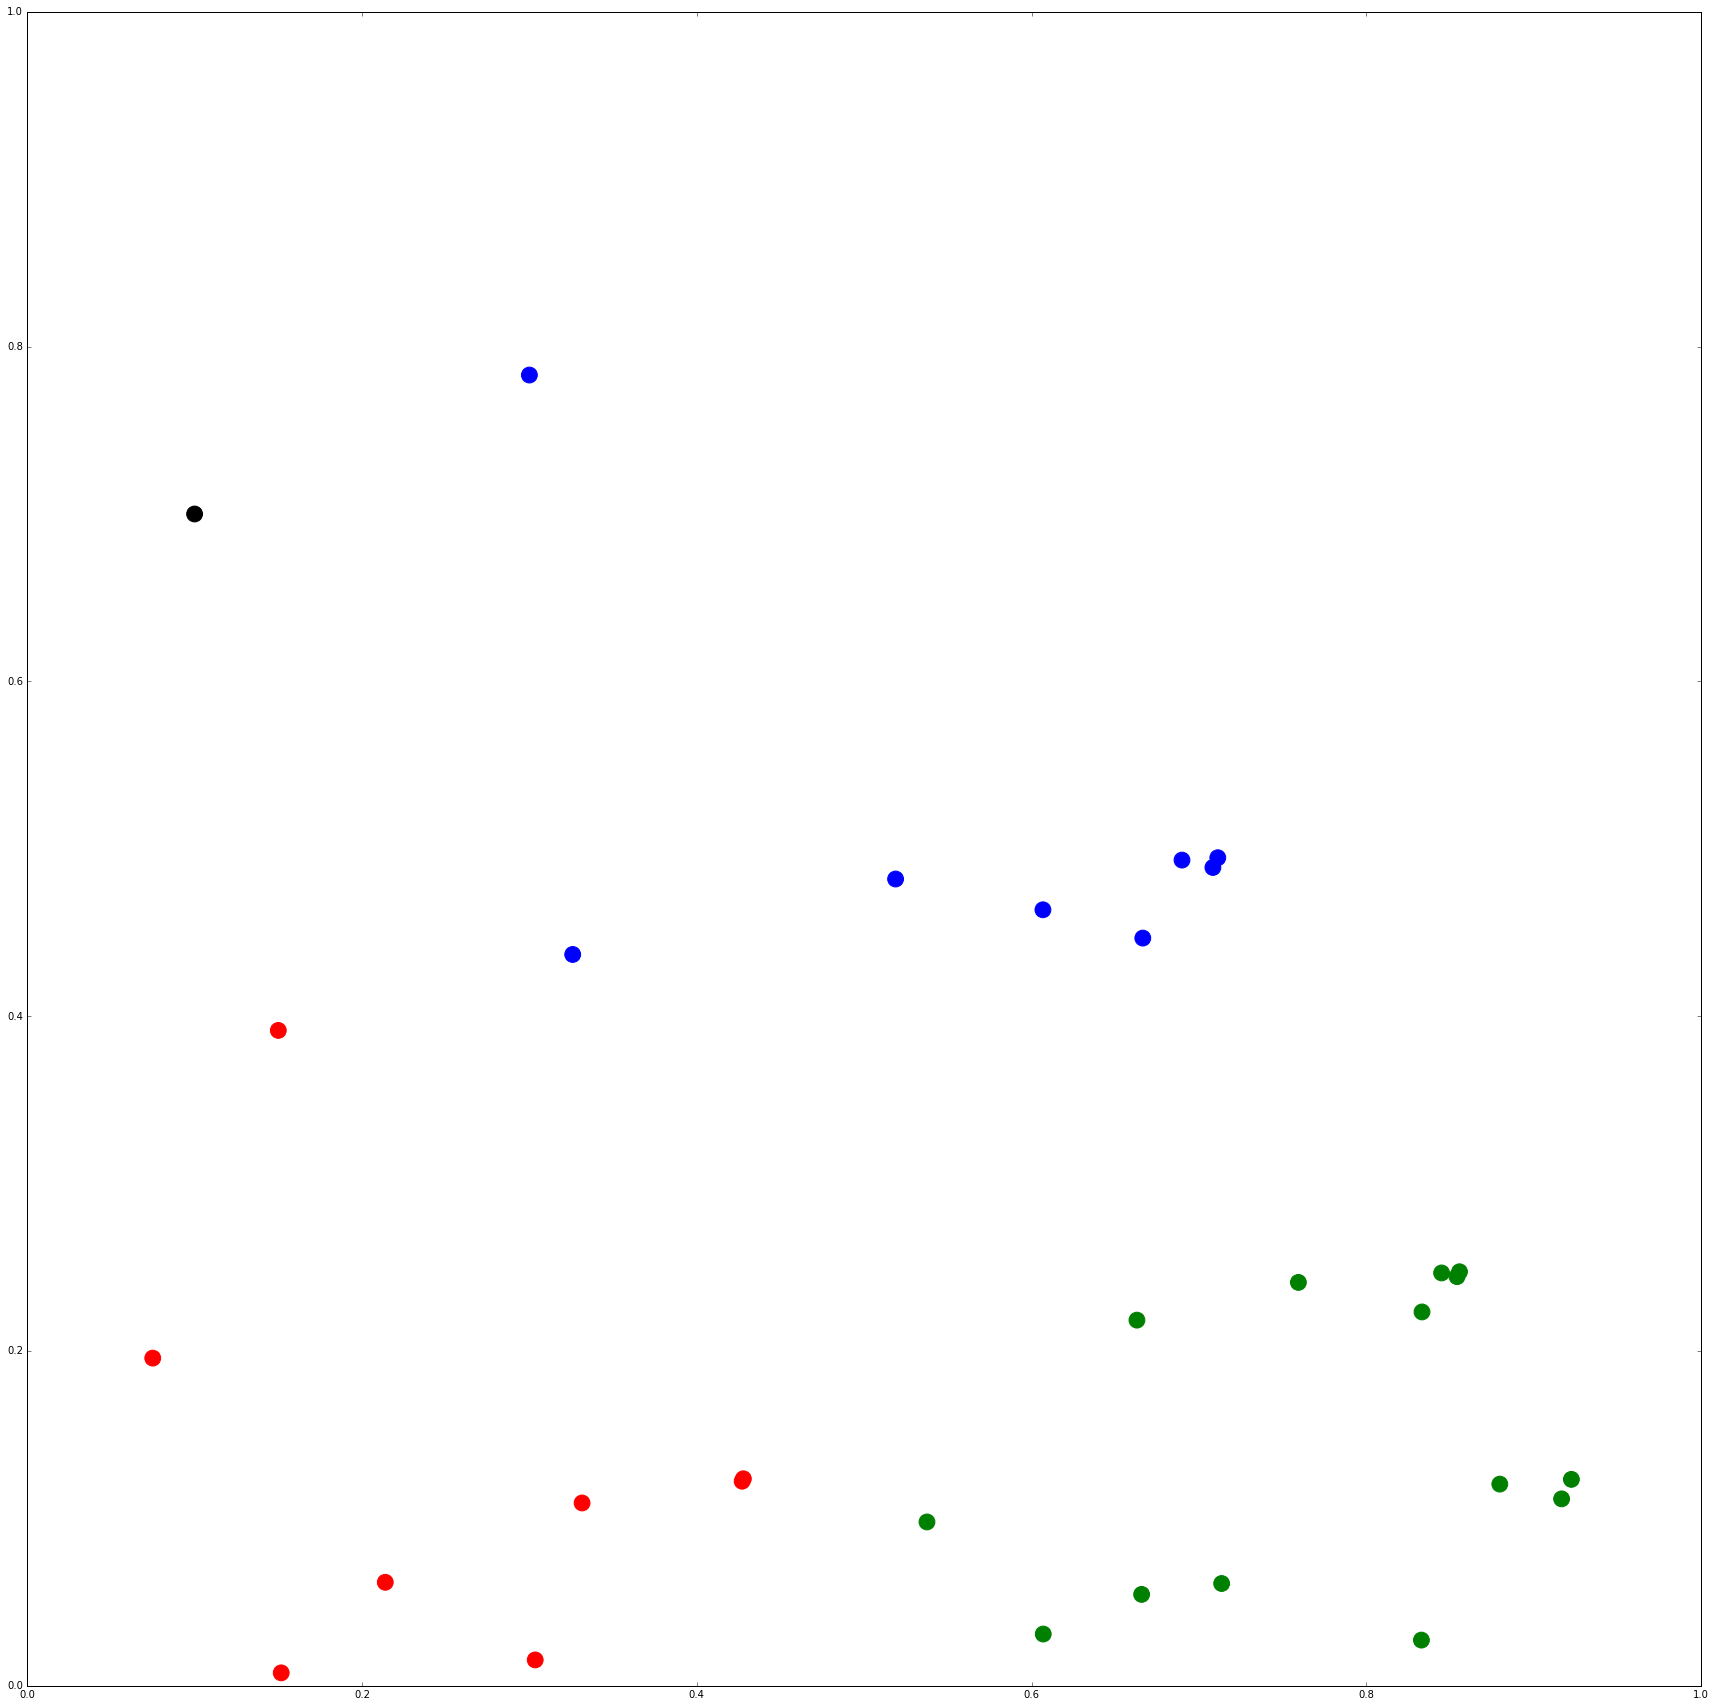

In [42]:
########################
########################
##
## Other Math Club people:
## Adjust nRolls!!!!! 4, 40, 400, 4000, 40000, 400000 etcetera

nRolls = 30

##
##
########################
########################

# import the numerical Python library
import numpy as np
from random import random as can_coord
from random import randint as die

# put the resulting figure below this cell in the browser
%pylab inline

# To see random cans set this value to True
random_cans = False

# The three paint cans are placed carefully... but we could choose to place them randomly also.
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
if random_cans:
    can1 = np.array([can_coord(), can_coord()])
    can2 = np.array([can_coord(), can_coord()])
    can3 = np.array([can_coord(), can_coord()])
else:
    can1 = np.array([0.0, 0.0])
    can2 = np.array([1.0, 0.0])
    can3 = np.array([0.5, np.sqrt(3.0)/2.0])

# Two Lists: A list of numpy 2-element arrays (x and y locations) and a list of color strings
x = [np.array([0.1, 0.7])]
c = ['k'] 

# From point 'a' jump half way to point 'b' and return that new location
def MoveHalfway(a, b):
    return a + 0.5*(b-a)

# From location a generate three new points c, d, e and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def Paint_a_dot(my_location):   
    die_roll = die(1,6)
    if die_roll < 3:   next_can, this_dot_color = can1, 'r'
    elif die_roll < 5: next_can, this_dot_color = can2, 'g'
    else:              next_can, this_dot_color = can3, 'b'
    new_location = MoveHalfway(my_location, next_can)    
    x.append(new_location)
    c.append(this_dot_color)
    return

for i in range(nRolls): Paint_a_dot(x[i])

xc=[q[0] for q in x]
yc=[q[1] for q in x]   

# Let's make this a big figure
figdim = 30
plt.figure(figsize=(figdim,figdim))

if nRolls < 10: dotsize = 4000
elif nRolls < 100: dotsize = 1000
elif nRolls < 1000: dotsize = 200
elif nRolls < 10000: dotsize = 100
else: dotsize = 1

# The ',' comma marker is a small dot, as is the period '.' marker:
plt.scatter(xc, yc, s=dotsize, marker='.', color=c)
plt.xlim([0., 1.])
plt.ylim([0., 1.])

#### Variation of the above

The code below goes through a similar process. However instead of rolling dice to choose one direction it goes in all three directions. It uses a technique called recursion where a function calls itself. This is a bit like looking into a mirror with another mirror behind you: It looks like you can fall into an infinite number of smaller reflections of yourself. Here we limit the falling to 11 levels deep.


Populating the interactive namespace from numpy and matplotlib
0.6484375
265720


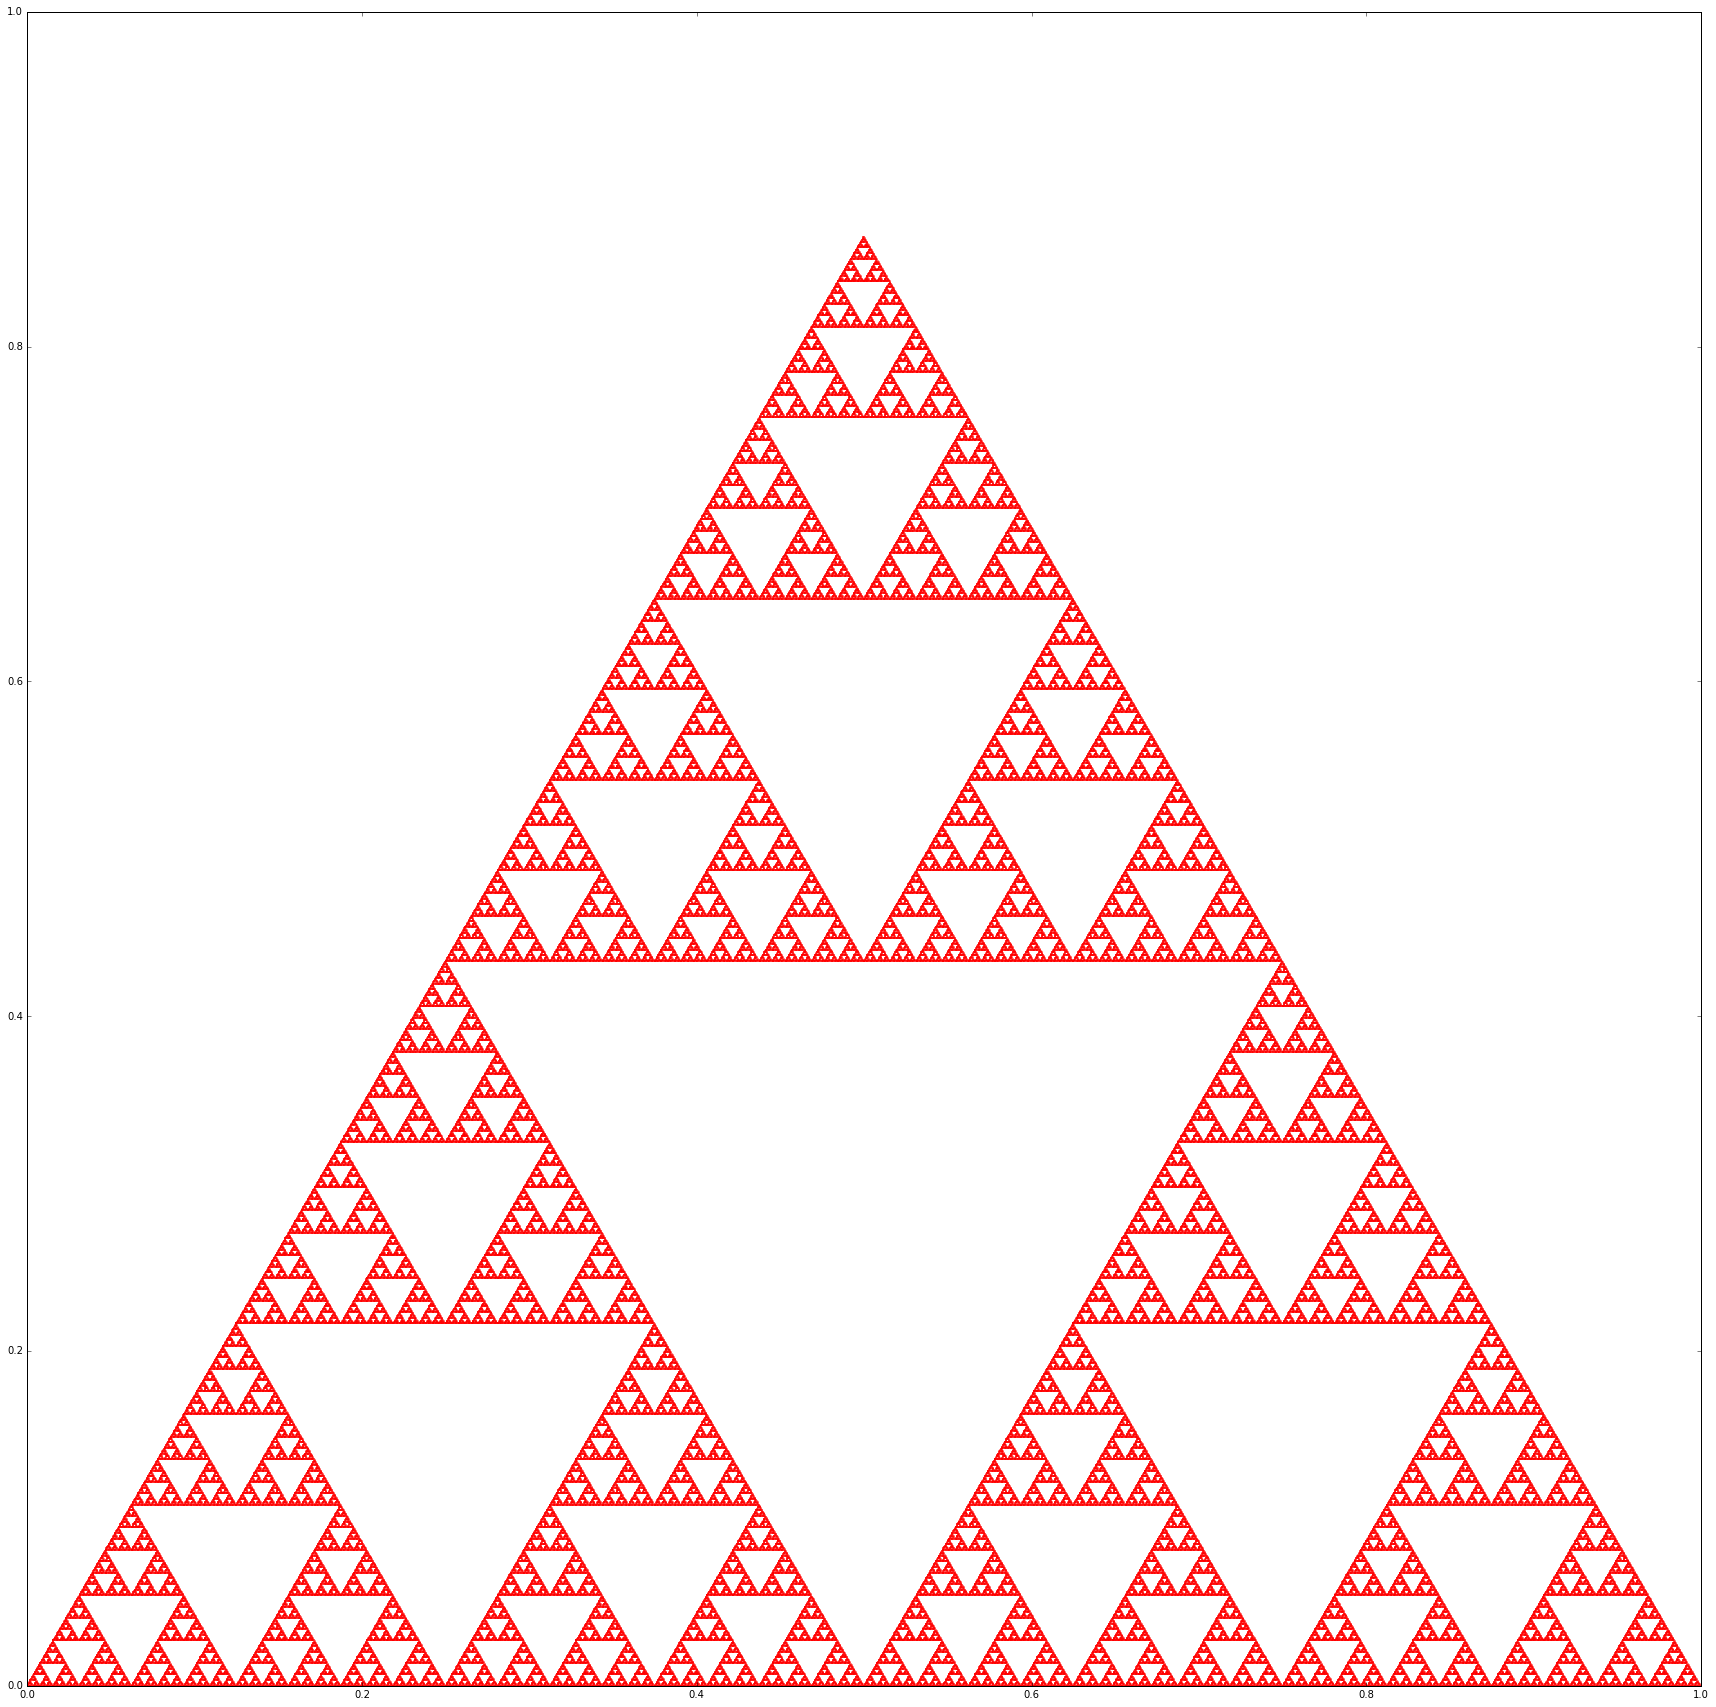

In [43]:
# import the numerical Python library
import numpy as np

# put the resulting figure below this cell in the browser
%pylab inline

# The three paint cans are placed carefully... but we could choose to place them randomly also.
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
v1 = np.array([0.0, 0.0])
v2 = np.array([1.0, 0.0])
v3 = np.array([0.5, np.sqrt(3.0)/2.0])

# Two Lists: Will hold pairs of (x, y) coordinates
x = []
y = []

# We add a first (seed) point to our list of points, outside the triangle
# x.append(0.924)
# y.append(0.873)

# To make the results look cleaner start with these values:
x.append(0.0)
y.append(0.0)

# We indicate that we have one point so far by pointing to its index, 0
currentIndex = len(x)-1

# Euclidean distance returned as a float (not used)
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

# From point a jump half way to point b and return that new location
def MoveHalfway(a, b):
    return a + 0.5*(b-a)

# From location a generate three new points c, d, e and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def Trifurcate(a, level, endLevel):

    # currentIndex is easy to work with as a global variable
    global currentIndex
    
    # if we are deep enough in the recursion: Just quit
    if level == endLevel: return
    
    # The first of three new locations is q
    q = MoveHalfway(a, v1)
    
    # Now append q onto the x/y Lists
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    
    # Recurse to myself using q as the new seed
    Trifurcate(q, level + 1, endLevel)
    
    # And repeat this two more times with respect to v2 and v3
    q = MoveHalfway(a, v2)
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    Trifurcate(q, level + 1, endLevel)
    
    q = MoveHalfway(a, v3)
    x.append(q[0])
    y.append(q[1])
    currentIndex += 1
    Trifurcate(q, level + 1, endLevel)
    
    # And now we're all done
    return


# This is the 'program' that runs from the seed point
Trifurcate((x[currentIndex],y[currentIndex]), 0, 11)

# Draw the scatter plot of (x, y) pairs
figdim = 30
plt.figure(figsize=(figdim,figdim))

print x[1000]

# The ',' comma marker is a small dot, as is the period '.' marker:
plt.scatter(x, y, s=1, marker='.', color='r')
plt.xlim([0., 1.])
plt.ylim([0., 1.])

# Mention how many points we ended up with
print len(x)
# print dir(x)


#### Continuing the thought

What would this produce if we only used two cans of paint on the piazza? How about 4? 5? 6? n?

In the cell below we introduce parameters: Numbers we can change to try different experiments. The two most important are the number of vertices (paint cans) which is called 'nVertices'. You can change this, and in the same way you can change 'howfar' from 0.5 to anything you like. You should also use the rule of thumb for 'nDepth'. This parameter controls how long the program takes and how much detail is visible in the end result.

In [ ]:
# import the numerical Python library
import numpy as np
import random as r

# put the resulting figure below this cell in the browser
%pylab inline

####################
###
###  Controls Section
###
####################
# The three paint cans are placed carefully... but we could choose to place them randomly also.
# Three (geometrical) vertices of an equilateral triangle of side = 1, one vertex at the origin
#
# Rule of thumb on how many vertices... More makes the program slower.
# 3 vertices: Depth can be 10 or maybe even 11
# 7 vertices: Make depth no bigger than 7 

# You can experiment with making this True or False
randomVertices = True


# This is our starting point, the triangular one
# nDepth = 11
# nVertices = 3
# howfar = 0.5

# Here is a pretty one
# nDepth = 5
# nVertices = 15
# howfar = 0.6

# Here is a pretty one
# nDepth = 5
# nVertices = 15
# howfar = 0.6

# Another with many vertices
# nDepth = 4
# nVertices = 23
# howfar = 0.72

# Simpler: Only five vertices
# nDepth = 9
# nVertices = 5
# howfar = 0.55

# This is what counts... change these to experiment
nDepth = 9
nVertices = 7
howfar = 0.65

centerx = 0.5
centery = 0.5
radius = 0.5
twopi = np.pi * 2.0
delta_angle = twopi / float(nVertices)


colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
color_modulo = len(colorList)

# Now v is a list of np.arrays
v = []

if randomVertices:
    for i in range(nVertices):
        thisx = r.random()
        thisy = r.random()
        v.append(np.array([thisx, thisy]))
        print i, thisx, thisy
else:
    this_angle = 0.0
    for i in range(nVertices):
        thisx = radius * np.cos(this_angle) + centerx
        thisy = radius * np.sin(this_angle) + centery
        v.append(np.array([thisx, thisy]))
        this_angle += delta_angle
        print i, thisx, thisy
    
# Two Lists: Will hold pairs of (x, y) coordinates
x = []
y = []
mycolors = []

# We add a first (seed) point to our list of points, outside the triangle
# x.append(0.924)
# y.append(0.873)

# To make the results look cleaner start with these values:
x.append(1.0)
y.append(0.5)
mycolors.append('k')

# We indicate that we have one point so far by pointing to its index, 0
currentIndex = len(x)-1

# From point a jump half way to point b and return that new location
def MovePartway(a, b):
    global howfar
    return a + howfar*(b-a)

# From location a generate nVertices new points c, d, e, ... and call myself recursively
#   Unless I have reached a particular end level based on the level counter
def FollowManyPaths(a, level, endLevel): 

    # currentIndex is easy to work with as a global variable
    global currentIndex
    
    # if we are deep enough in the recursion: Just quit
    if level == endLevel: return
    
    for i in range(nVertices):
        q = MovePartway(a, v[i])
        x.append(q[0])
        y.append(q[1])
        mycolors.append(colorList[i%color_modulo])
        currentIndex += 1
        FollowManyPaths(q, level + 1, endLevel)
    
    # And now we're all done
    return


# This is the 'program' that runs from the seed point
FollowManyPaths((x[currentIndex],y[currentIndex]), 0, nDepth)

# Draw the scatter plot of (x, y) pairs
figdim = 30
plt.figure(figsize=(figdim,figdim))

# The ',' comma marker is a small dot, as is the period '.' marker:
plt.scatter(x, y, s=1, marker='.', color=mycolors)
plt.xlim([0., 1.])
plt.ylim([0., 1.])

# Mention how many points we ended up with
print len(x)
# print dir(x)
